## DATA PREPRATION AND CUSTOMER ANALYTICS

We are tasked with analyzing the client's transaction dataset to understand customer purchasing behaviors and provide strategic recommendations. This analysis will support a category review and focus on identifying key customer segments and their chip purchasing patterns.

##### Main Goals:

* Examine Transaction Data: Identify and address missing data, anomalies, and outliers.
* Examine Customer Data: Perform similar checks and clean the customer data.
* Data Analysis & Segmentation: Create visualizations to uncover trends and insights.
* Customer Segments: Determine target segments based on purchasing behavior.
The findings and recommendations will guide strategic decisions for the chip category.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#read the ttransaction data
trns_data = pd.read_excel("QVI_transaction_data.xlsx")

In [5]:
#read the customer data 
cust_data = pd.read_csv("QVI_purchase_behaviour.csv")


In [7]:
trns_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [9]:
# Checking the first few rows of the dataframes
print(trns_data.head())
print(cust_data.head())

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Bu

## Summarize the data 

summarizing the transaction data 

In [11]:
trns_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


In [13]:
trns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [15]:
trns_data.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

summarizing the customer behaviour data 

In [17]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
cust_data.describe()


,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [21]:
cust_data.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

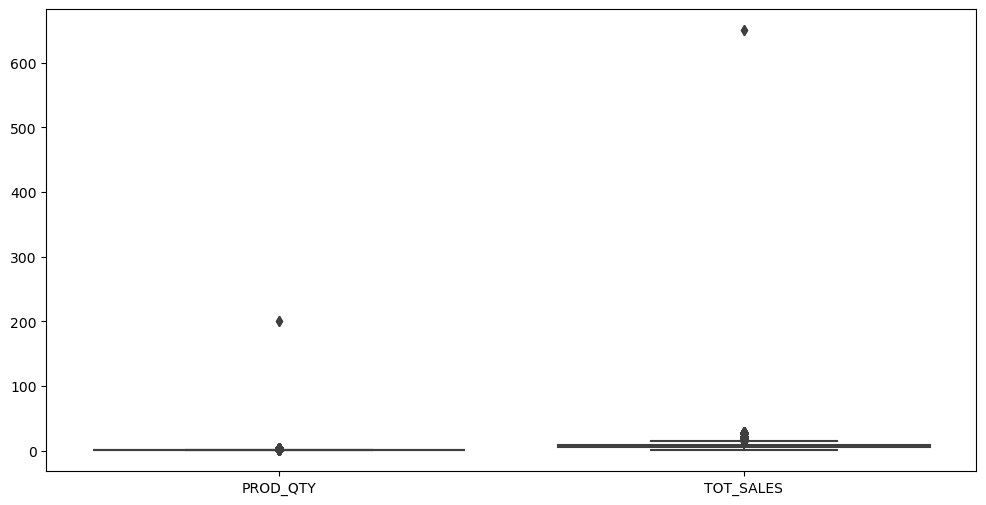

 Extreme Outliers :
            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [23]:
# Plotting boxplot for TOT_SALES and PROD_QTY to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=trns_data[['PROD_QTY', 'TOT_SALES']])
plt.show()

# Identifying and displaying outliers where PROD_QTY > 50
outliers = trns_data[trns_data['PROD_QTY'] > 50]
print(" Extreme Outliers :")
print(outliers.head())

In [25]:
#removing extreme outlier
trns_cleaned = trns_data[trns_data['PROD_QTY'] <= 50]

In [27]:
# Displaying the number of rows before and after removing outliers
print(f"Rows before removing outliers: {len(trns_data)}")
print(f"Rows after removing outliers: {len(trns_cleaned)}")

Rows before removing outliers: 264836
Rows after removing outliers: 264834


In [29]:
selected_columns = trns_cleaned[['PROD_QTY', 'TOT_SALES']]

# Generating summary statistics
summary = selected_columns.describe()

print(summary)

            PROD_QTY      TOT_SALES
count  264834.000000  264834.000000
mean        1.905813       7.299346
std         0.343436       2.527241
min         1.000000       1.500000
25%         2.000000       5.400000
50%         2.000000       7.400000
75%         2.000000       9.200000
max         5.000000      29.500000


In [31]:
# Filter rows where TOT_SALES is 29.5
high_sales = trns_cleaned[trns_cleaned['TOT_SALES'] == 29.5]

# Display the relevant columns: TOT_SALES and PROD_QTY
print(high_sales[['TOT_SALES', 'PROD_QTY']])

        TOT_SALES  PROD_QTY
5179         29.5         5
55558        29.5         5
69496        29.5         5
117850       29.5         5
150683       29.5         5
171815       29.5         5
184969       29.5         5


#### Exploring Product name Column

In [33]:
# Displaying unique product names
unique_products = trns_cleaned['PROD_NAME'].unique()
print(unique_products)


['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red Rock 

In [35]:
# Remove leading and trailing spaces
trns_cleaned['PROD_NAME'] = trns_cleaned['PROD_NAME'].str.strip()

# Remove extra spaces between words
trns_cleaned['PROD_NAME'] = trns_cleaned['PROD_NAME'].str.replace(r'\s+', ' ', regex=True)

# Display the cleaned DataFrame
print(trns_cleaned[['PROD_NAME']])


C:\Users\Raman\AppData\Local\Temp\ipykernel_18552\827144770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trns_cleaned['PROD_NAME'] = trns_cleaned['PROD_NAME'].str.strip()


                                       PROD_NAME
0                Natural Chip Compny SeaSalt175g
1                          CCs Nacho Cheese 175g
2          Smiths Crinkle Cut Chips Chicken 170g
3          Smiths Chip Thinly S/Cream&Onion 175g
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g
...                                          ...
264831   Kettle Sweet Chilli And Sour Cream 175g
264832              Tostitos Splash Of Lime 175g
264833                     Doritos Mexicana 170g
264834   Doritos Corn Chip Mexican Jalapeno 150g
264835              Tostitos Splash Of Lime 175g

[264834 rows x 1 columns]


C:\Users\Raman\AppData\Local\Temp\ipykernel_18552\827144770.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trns_cleaned['PROD_NAME'] = trns_cleaned['PROD_NAME'].str.replace(r'\s+', ' ', regex=True)


In [37]:
# Step 1: Extract PACK_SIZE
trns_cleaned['PACK_SIZE'] = trns_cleaned['PROD_NAME'].str.extract(r'(\d+\s*[gG])')

# Step 2: Remove PACK_SIZE from PROD_NAME
trns_cleaned['PROD_NAME'] = trns_cleaned['PROD_NAME'].str.replace(r'\d+\s*[gG]', '', regex=True).str.strip()

# Display the modified DataFrame
print(trns_cleaned)


C:\Users\Raman\AppData\Local\Temp\ipykernel_18552\4093078710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trns_cleaned['PACK_SIZE'] = trns_cleaned['PROD_NAME'].str.extract(r'(\d+\s*[gG])')


             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                  PROD_NAME  PROD_QTY  TOT_SALES PACK_SIZE  
0               Natural Chip Compny SeaSalt         2        6.0      175g  
1                          CCs Nacho Cheese         3

C:\Users\Raman\AppData\Local\Temp\ipykernel_18552\4093078710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trns_cleaned['PROD_NAME'] = trns_cleaned['PROD_NAME'].str.replace(r'\d+\s*[gG]', '', regex=True).str.strip()


In [93]:
trns_cleaned['PROD_NAME'].unique()

array(['Natural Chip Compny SeaSalt', 'CCs Nacho Cheese',
       'Smiths Crinkle Cut Chips Chicken',
       'Smiths Chip Thinly S/Cream&Onion',
       'Kettle Tortilla ChpsHny&Jlpno Chili',
       'Smiths Crinkle Chips Salt & Vinegar', 'Grain Waves Sweet Chilli',
       'Doritos Corn Chip Mexican Jalapeno',
       'Grain Waves Sour Cream&Chives', 'Kettle Sensations Siracha Lime',
       'Twisties Cheese', 'WW Crinkle Cut Chicken',
       'Thins Chips Light& Tangy', 'CCs Original',
       'NCC Sour Cream & Garden Chives',
       'Doritos Corn Chip Southern Chicken', 'Cheezels Cheese Box',
       'Smiths Crinkle Original', 'Kettle Sea Salt And Vinegar',
       'Smiths Chip Thinly Cut Original', 'Kettle Original',
       'Red Rock Deli Thai Chilli&Lime', 'Pringles Sthrn FriedChicken',
       'Pringles Sweet&Spcy BBQ', 'Thins Chips Originl saltd',
       'Red Rock Deli Sp Salt & Truffle',
       'Smiths Thinly Swt Chli&S/Cream', 'Kettle Chilli',
       'Doritos Mexicana', 'Smiths Crinkle C

In [113]:
keywords_to_remove = [
    'salsa dip', 'Red Rock Deli Roast Chicken & Garlic Aioli', 'Red Rock Deli Chikn&Garlic Aioli', 
    'Twisties Cheese Burger', 'Crnchers Tangy Gcamole', 'Burger Rings',
    'Infuzions BBQ Rib Prawn Crackers', 'Infuzions Mango Chutny Papadums', 'GrnWves Plus Btroot & Chilli Jam', 
    'Infuzions SourCream&Herbs Veg Strws', 'Cheetos Puffs'
]

# Ensure PROD_NAME is a string and use .loc to avoid the SettingWithCopyWarning
trns_cleaned.loc[:, 'PROD_NAME'] = trns_cleaned['PROD_NAME'].astype(str)

# Create a boolean mask to identify rows that contain any of the keywords
mask = trns_cleaned['PROD_NAME'].str.contains('|'.join(keywords_to_remove), case=False, na=False)

# Filter the DataFrame to remove rows with the keywords
trns_cleaned = trns_cleaned.loc[~mask]

# Display the first few rows of the cleaned DataFrame
print(trns_cleaned['PROD_NAME'].unique())

['Natural Chip Compny SeaSalt' 'CCs Nacho Cheese'
 'Smiths Crinkle Cut Chips Chicken' 'Smiths Chip Thinly S/Cream&Onion'
 'Kettle Tortilla ChpsHny&Jlpno Chili'
 'Smiths Crinkle Chips Salt & Vinegar' 'Grain Waves Sweet Chilli'
 'Doritos Corn Chip Mexican Jalapeno' 'Grain Waves Sour Cream&Chives'
 'Kettle Sensations Siracha Lime' 'Twisties Cheese'
 'WW Crinkle Cut Chicken' 'Thins Chips Light& Tangy' 'CCs Original'
 'NCC Sour Cream & Garden Chives' 'Doritos Corn Chip Southern Chicken'
 'Cheezels Cheese Box' 'Smiths Crinkle Original'
 'Kettle Sea Salt And Vinegar' 'Smiths Chip Thinly Cut Original'
 'Kettle Original' 'Red Rock Deli Thai Chilli&Lime'
 'Pringles Sthrn FriedChicken' 'Pringles Sweet&Spcy BBQ'
 'Thins Chips Originl saltd' 'Red Rock Deli Sp Salt & Truffle'
 'Smiths Thinly Swt Chli&S/Cream' 'Kettle Chilli' 'Doritos Mexicana'
 'Smiths Crinkle Cut French OnionDip' 'Natural ChipCo Hony Soy Chckn'
 'Dorito Corn Chp Supreme' 'Twisties Chicken'
 'Smiths Thinly Cut Roast Chicken' 'Kettle

In [115]:
# Display the first few rows of the dataset to understand the pattern
print(trns_cleaned[['PROD_NAME']].head())

# Define a function to extract the brand name
def extract_brand_name(prod_name):
    if isinstance(prod_name, str):  # Check if the value is a string
        parts = prod_name.split()
        if parts:
            return parts[0]  # Assuming the first part is the brand name
    return ""

# Ensure you're working with a copy if necessary
trns_cleaned = trns_cleaned.copy()

# Apply the function to extract the brand name
trns_cleaned['BRAND_NAME'] = trns_cleaned['PROD_NAME'].apply(extract_brand_name)

# Display the updated dataframe
print(trns_cleaned[['PROD_NAME', 'BRAND_NAME']].head())

                             PROD_NAME
0          Natural Chip Compny SeaSalt
1                     CCs Nacho Cheese
2     Smiths Crinkle Cut Chips Chicken
3     Smiths Chip Thinly S/Cream&Onion
4  Kettle Tortilla ChpsHny&Jlpno Chili
                             PROD_NAME BRAND_NAME
0          Natural Chip Compny SeaSalt    Natural
1                     CCs Nacho Cheese        CCs
2     Smiths Crinkle Cut Chips Chicken     Smiths
3     Smiths Chip Thinly S/Cream&Onion     Smiths
4  Kettle Tortilla ChpsHny&Jlpno Chili     Kettle


In [119]:
trns_cleaned['BRAND_NAME'].nunique()

25

In [ ]:
trns_cleaned[]

In [125]:
# Define the correction dictionary
corrections = {
    'Natural': 'Natural Chip Company',
    'WW': 'Woolworths',
    'Smiths': 'Smiths',
    'Dorito': 'Doritos',
    'Red': 'Red Rock Deli',
    'Grain': 'Grain Waves',
    'RRD': 'Red Rock Deli',
    'Infzns': 'Infuzions',
    'Smith': 'Smiths',
    'French': 'French Fries',
    'NCC': 'Natural Chip Company',
    'Snbts': 'Sunbites'
}

# Function to correct brand names
def correct_brand_name(name):
    for key in corrections:
        if key in name:
            return corrections[key]
    return name

# Apply the function to correct the 'Brand_Name'
trns_cleaned['BRAND_NAME'] = trns_cleaned['BRAND_NAME'].apply(correct_brand_name)

# Display the updated DataFrame
print(trns_cleaned[['PROD_NAME', 'BRAND_NAME']])

                                  PROD_NAME            BRAND_NAME
0               Natural Chip Compny SeaSalt  Natural Chip Company
1                          CCs Nacho Cheese                   CCs
2          Smiths Crinkle Cut Chips Chicken                Smiths
3          Smiths Chip Thinly S/Cream&Onion                Smiths
4       Kettle Tortilla ChpsHny&Jlpno Chili                Kettle
...                                     ...                   ...
264831   Kettle Sweet Chilli And Sour Cream                Kettle
264832              Tostitos Splash Of Lime              Tostitos
264833                     Doritos Mexicana               Doritos
264834   Doritos Corn Chip Mexican Jalapeno               Doritos
264835              Tostitos Splash Of Lime              Tostitos

[226698 rows x 2 columns]


In [127]:
trns_cleaned['BRAND_NAME'].nunique()

19

#### Exploring DATE column

In [43]:
trns_cleaned['DATE'].nunique()

364

In [45]:

date_range = pd.date_range(start=trns_cleaned['DATE'].min(), end=trns_cleaned['DATE'].max(), freq='D')
missing_dates = date_range[~date_range.isin(trns_cleaned['DATE'])]

print(missing_dates)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')


checking it visually 

D:\software\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\software\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


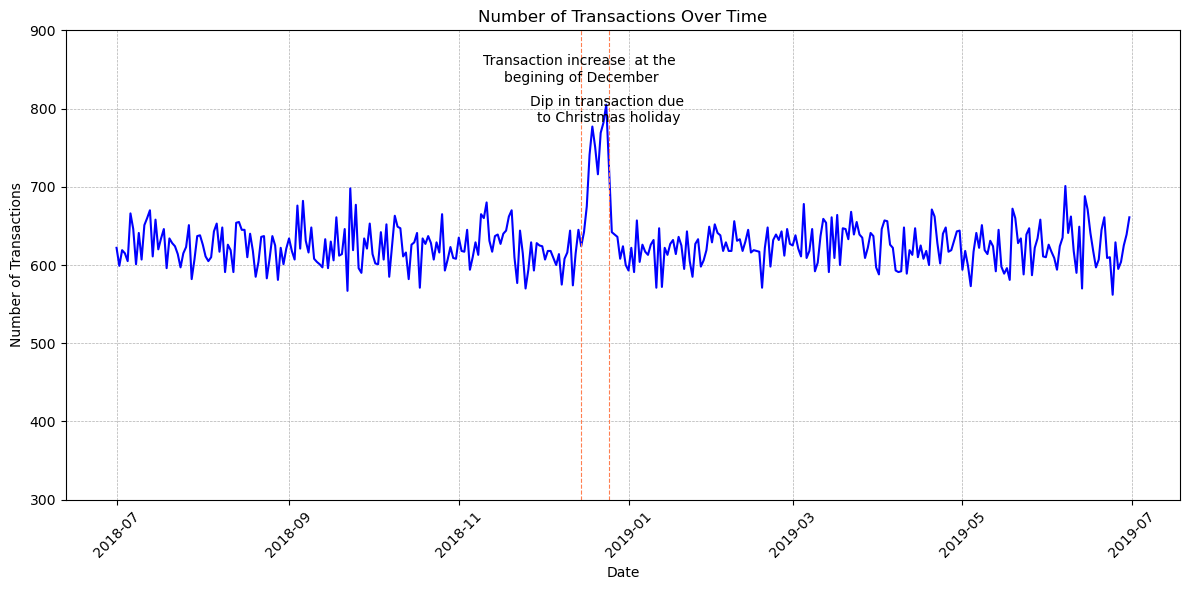

In [47]:


# Sample data preparation
transactionByDate = trns_cleaned.groupby('DATE').size().reset_index(name='N')

# Define significant dates and events
transactDate = pd.DataFrame({
    'DATE': pd.to_datetime(['2018-12-15', '2018-12-25']),
    'event': ['Transaction increase  at the \nbegining of December','\n\n\n\n\nDip in transaction due \nto Christmas holiday']
})

# Create the plot
plt.figure(figsize=(12, 6))

# Line plot for transactions over time
sns.lineplot(data=transactionByDate, x='DATE', y='N', color='blue')

# Customize the plot
plt.ylim(300, 900)
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Over Time')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('white')

# Add vertical lines and annotations for significant dates
for _, row in transactDate.iterrows():
    plt.axvline(x=row['DATE'], color='coral', linestyle='--', linewidth=0.8)
    plt.text(row['DATE'], 850, row['event'], rotation=0, color='black', ha='center', va='center')

# Show the plot
plt.tight_layout()
plt.show()


After examining the trend of the number of transactions over time, I have labeled the graph for use in the presentation. The graph highlights two key points:
- **Transactions rise at the beginning of December**
- **Dip in transactions due to Christmas holiday**

Next, I will check for any duplicates in the data to ensure its accuracy and integrity.

In [49]:
# Find duplicate rows in the dataset
duplicates = trns_cleaned[trns_cleaned.duplicated()]

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# Display the duplicate rows if any
if not duplicates.empty:
    print(duplicates)
else:
    print("No duplicate rows found.")


Number of duplicate rows: 1
             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
124845 2018-10-01        107          107024  108462        45   

                              PROD_NAME  PROD_QTY  TOT_SALES PACK_SIZE  
124845  Smiths Thinly Cut Roast Chicken         2        6.0      175g  


In [55]:
# Find duplicate rows in the customer behaviour
duplicates = cust_data[cust_data.duplicated()]

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# Display the duplicate rows if any
if not duplicates.empty:
    print(duplicates)
else:
    print("No duplicate rows found.")


Number of duplicate rows: 0
No duplicate rows found.


In [133]:

# Merging TRANSACTION DATA  and CUSTOMER BEHAVIOUR DATA 
merged_data = pd.merge(trns_cleaned, cust_data, on='LYLTY_CARD_NBR', how='inner')

# Display the first few rows of the merged dataset
print(merged_data.head())


        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2018-11-10          1            1307     346        96   
3 2019-03-09          1            1307     347        54   
4 2019-05-20          1            1343     383        61   

                          PROD_NAME  PROD_QTY  TOT_SALES PACK_SIZE  \
0       Natural Chip Compny SeaSalt         2        6.0      175g   
1                  CCs Nacho Cheese         3        6.3      175g   
2         WW Original Stacked Chips         2        3.8      160g   
3                      CCs Original         1        2.1      175g   
4  Smiths Crinkle Cut Chips Chicken         2        2.9      170g   

             BRAND_NAME               LIFESTAGE PREMIUM_CUSTOMER  
0  Natural Chip Company   YOUNG SINGLES/COUPLES          Premium  
1                   CCs  MIDAGE SINGLES/COUPLES           Budget  
2          

## DATA ANALYSIS

D:\software\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


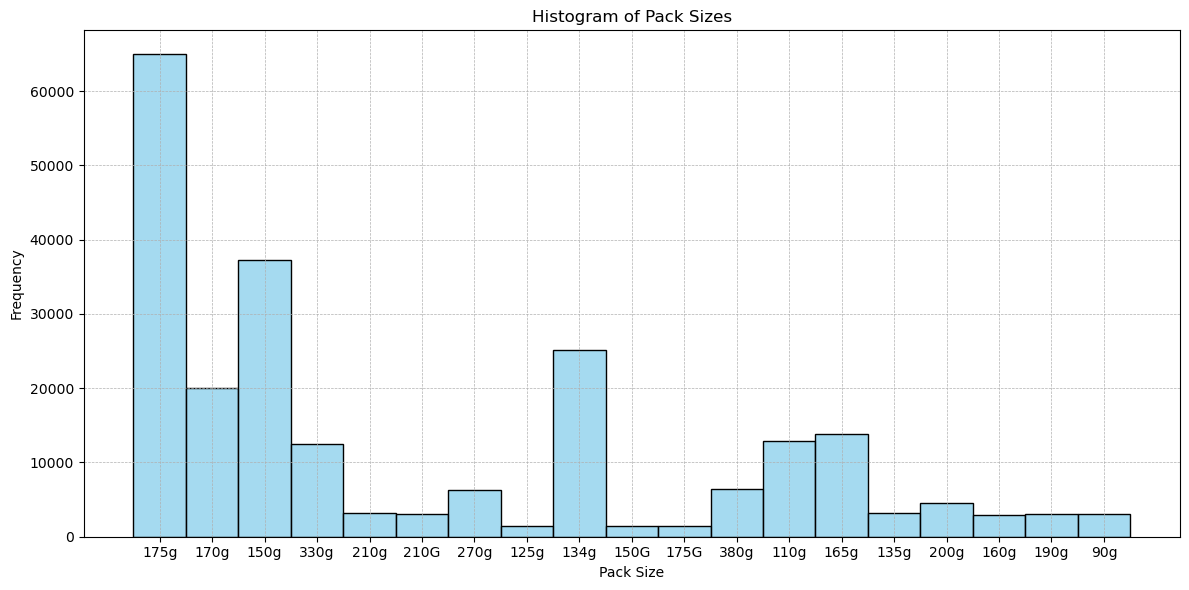

In [223]:
#showing pack size distribution
plt.figure(figsize=(12, 6))
sns.histplot(trns_cleaned['PACK_SIZE'], bins=20, kde=False, color='skyblue')

# Customize the plot
plt.xlabel('Pack Size')
plt.ylabel('Frequency')
plt.title('Histogram of Pack Sizes')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('white')

# Show the plot
plt.tight_layout()
plt.show()


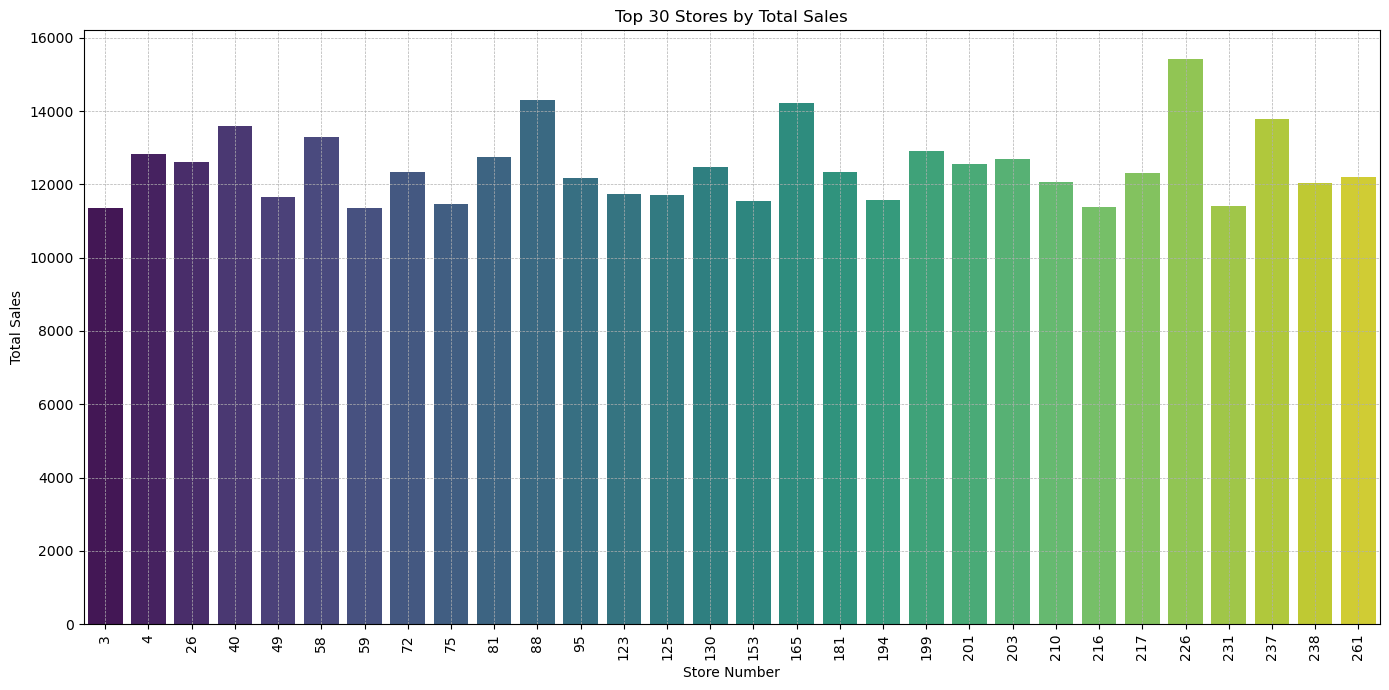

In [178]:
# Get the top 30 stores by total sales
top_stores = sales_by_store.head(30)
top_stores = sales_by_store.sort_values(by='TOT_SALES', ascending=False).head(0)

# Plot the bar chart for the top stores
plt.figure(figsize=(14, 7))
sns.barplot(x='STORE_NBR', y='TOT_SALES', data=top_stores, palette='viridis')

# Customize the plot
plt.title('Top 30 Stores by Total Sales')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


In [181]:
merged_data.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND_NAME',
       'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

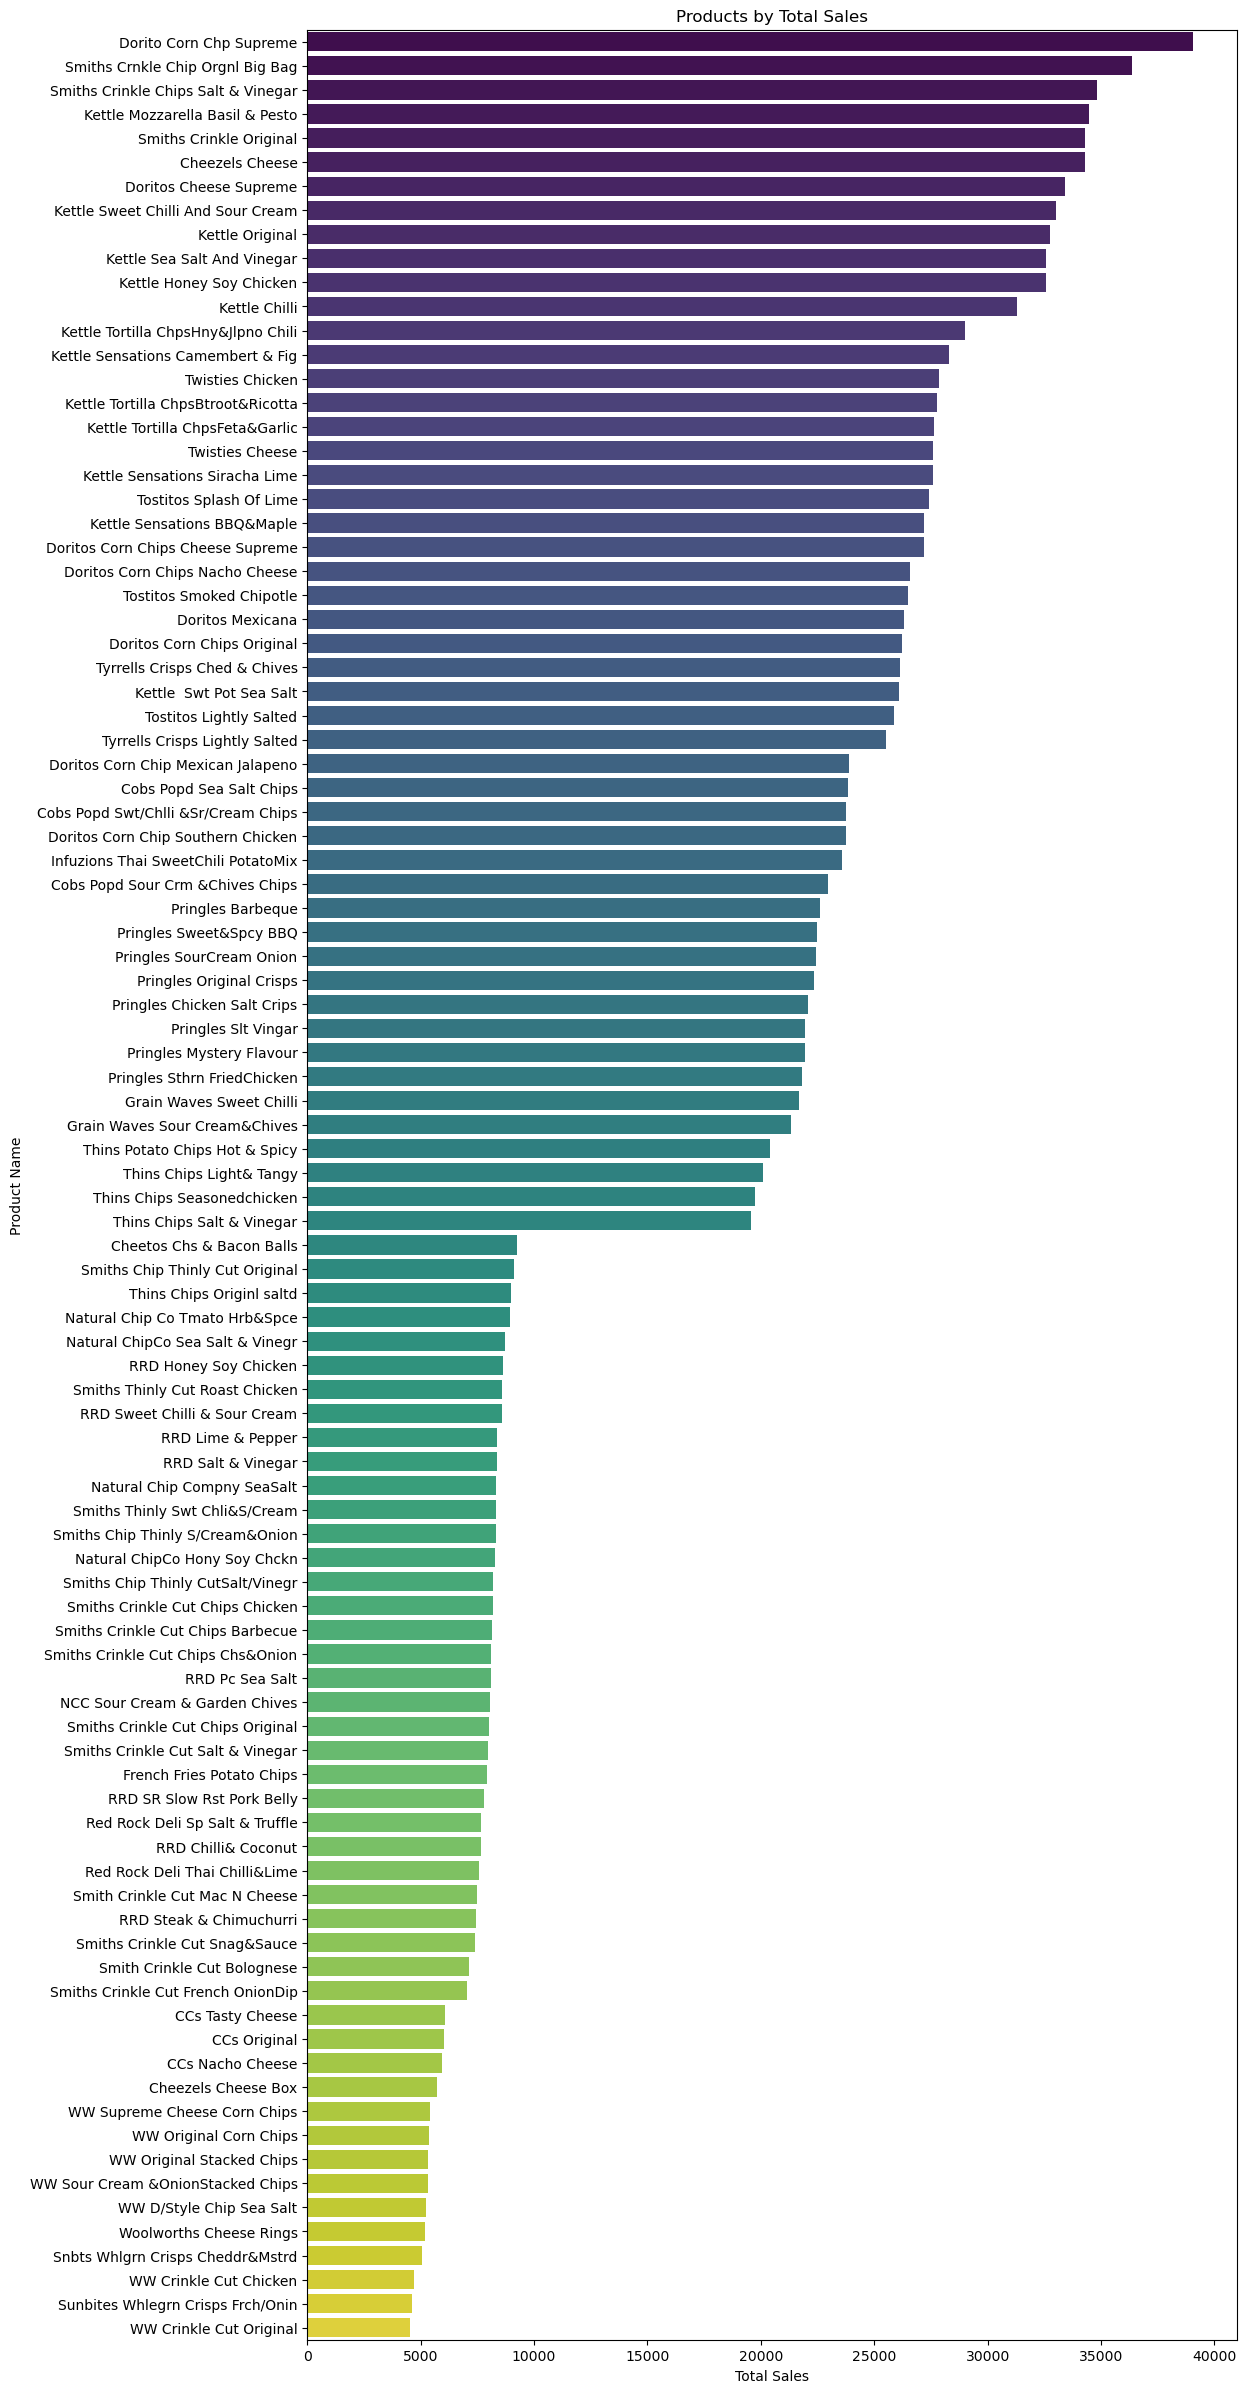

In [193]:
# Sales by product
sales_by_product = merged_data.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()

# Plot sales by product
plt.figure(figsize=(12, 30))
sns.barplot(data=sales_by_product.sort_values(by='TOT_SALES', ascending=False), x='TOT_SALES', y='PROD_NAME', palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.title('Products by Total Sales')
plt.show()


In [219]:
# Count the frequency of each unique value in the PROD_QTY column
quantity_frequency = merged_data['PROD_QTY'].value_counts().reset_index()
quantity_frequency.columns = ['PROD_QTY', 'Frequency']

# Sort by PROD_QTY for better readability
quantity_frequency = quantity_frequency.sort_values(by='PROD_QTY')

# Display the frequency count
print(quantity_frequency)


   PROD_QTY  Frequency
1         1      23353
0         2     202255
2         3        377
4         4        340
3         5        373


In [214]:
# Aggregate sales by brand
sales_by_brand = merged_data.groupby('BRAND_NAME')['TOT_SALES'].sum().reset_index()

# Sort brands by total sales in descending order
sales_by_brand = sales_by_brand.sort_values(by='TOT_SALES', ascending=False)


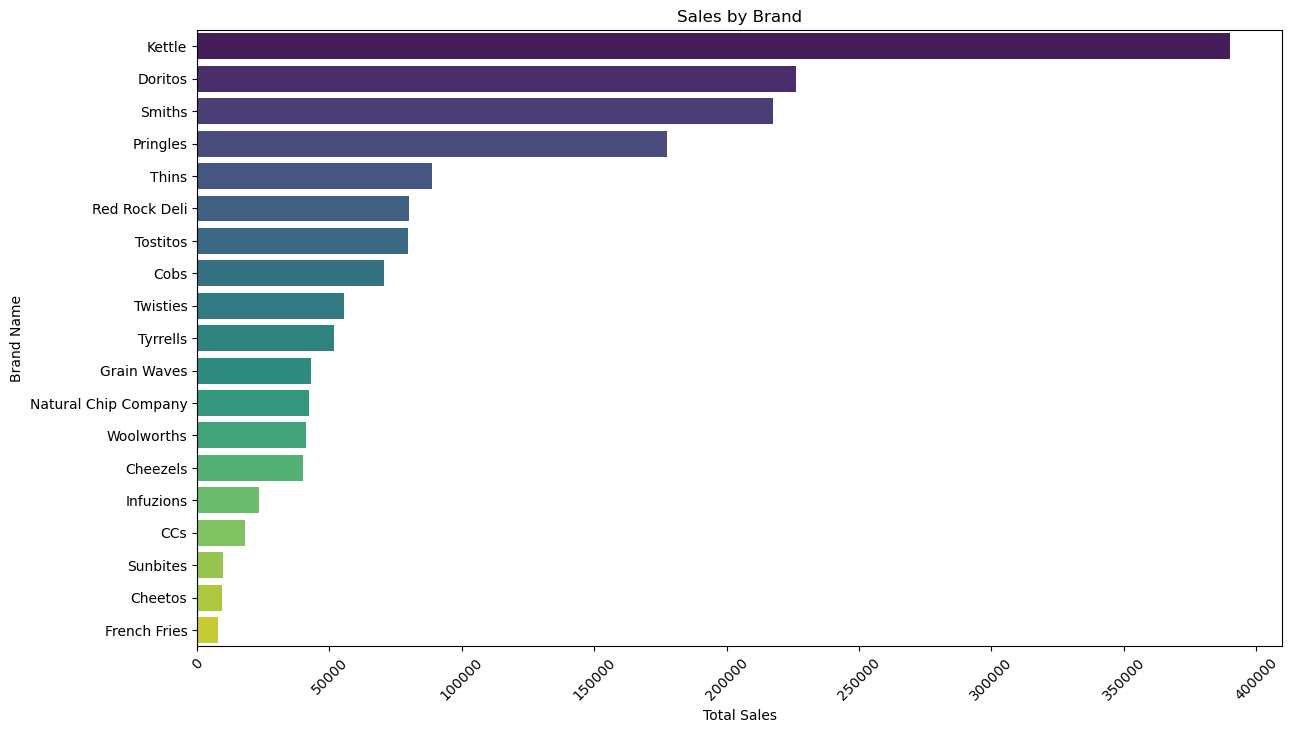

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sales by brand
plt.figure(figsize=(14, 8))
sns.barplot(data=sales_by_brand, x='TOT_SALES', y='BRAND_NAME', palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Brand Name')
plt.title('Sales by Brand')
plt.xticks(rotation=45)
plt.show()


In [ ]:
customer segment 

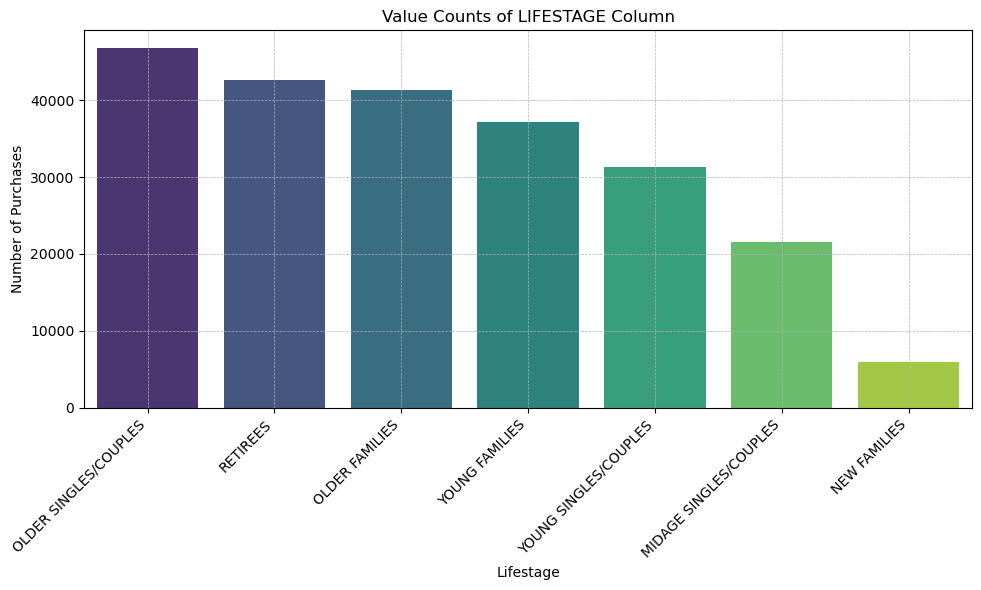

In [221]:
# Graph to show the value counts of Lifestage column in purchase dataframe

lifestage_counts = merged_data['LIFESTAGE'].value_counts()

# Plot the value counts
plt.figure(figsize=(10, 6))
sns.barplot(x=lifestage_counts.index, y=lifestage_counts.values, palette='viridis')

# Customize the plot
plt.title('Value Counts of LIFESTAGE Column')
plt.xlabel('Lifestage')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

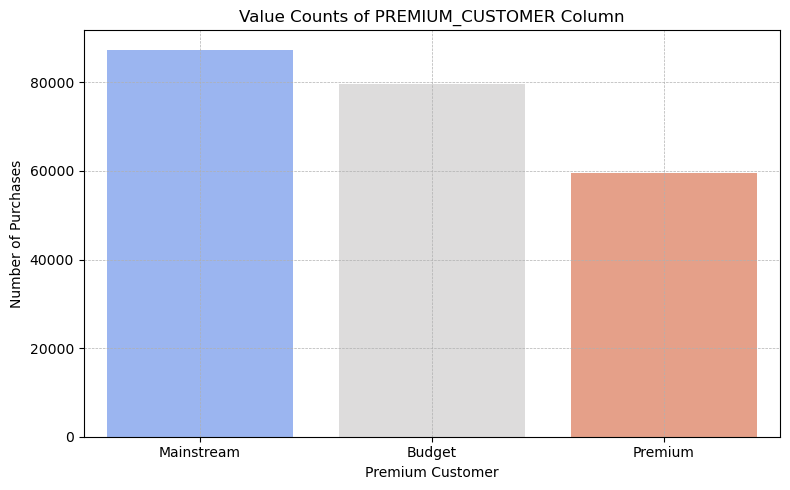

In [141]:

# Count the occurrences of each PREMIUM_CUSTOMER category
premium_customer_counts = merged_data['PREMIUM_CUSTOMER'].value_counts()

# Plot the value counts
plt.figure(figsize=(8, 5))
sns.barplot(x=premium_customer_counts.index, y=premium_customer_counts.values, palette='coolwarm')

# Customize the plot
plt.title('Value Counts of PREMIUM_CUSTOMER Column')
plt.xlabel('Premium Customer')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


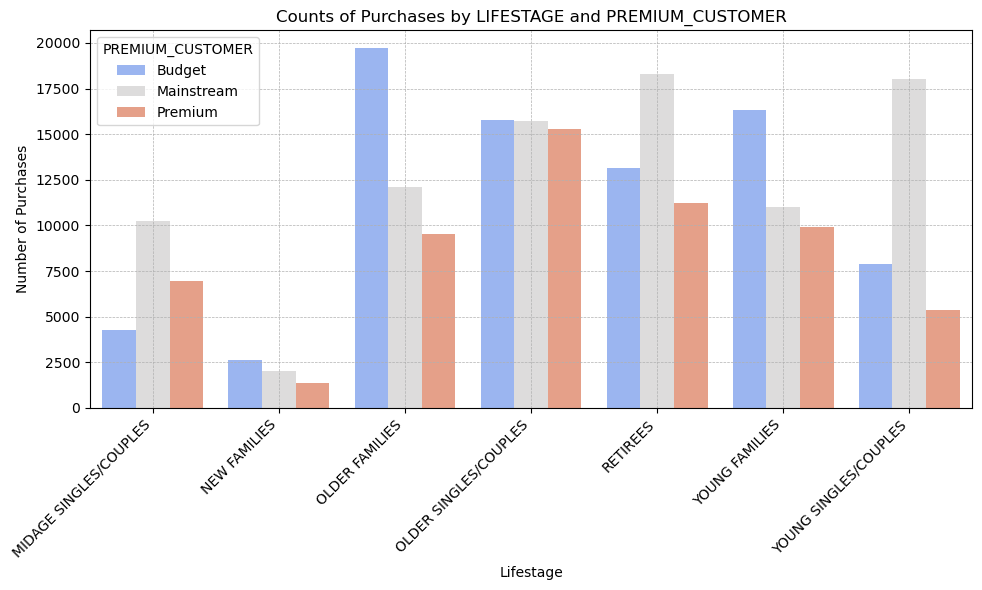

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by LIFESTAGE and PREMIUM_CUSTOMER to get the counts
lifestage_premium_counts = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='counts')

# Plot the value counts
plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y='counts', hue='PREMIUM_CUSTOMER', data=lifestage_premium_counts, palette='coolwarm')

# Customize the plot
plt.title('Counts of Purchases by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('Lifestage')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


In [235]:
# Count the number of unique customers by LIFESTAGE and PREMIUM_CUSTOMER segments
customers_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
customers_by_segment.rename(columns={'LYLTY_CARD_NBR': 'NUM_CUSTOMERS'}, inplace=True)

# Calculate the total sales by LIFESTAGE and PREMIUM_CUSTOMER segments
total_sales_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
total_sales_by_segment.rename(columns={'TOT_SALES': 'TOTAL_SALES'}, inplace=True)

# Merge the two DataFrames to include both unique customer counts and total sales
result = pd.merge(customers_by_segment, total_sales_by_segment, on=['LIFESTAGE', 'PREMIUM_CUSTOMER'])

# Sort the result by TOTAL_SALES in descending order
result_sorted = result.sort_values(by='TOTAL_SALES', ascending=False)

# Display the sorted result
print(result_sorted)


                 LIFESTAGE PREMIUM_CUSTOMER  NUM_CUSTOMERS  TOTAL_SALES
6           OLDER FAMILIES           Budget           4523    144900.45
19   YOUNG SINGLES/COUPLES       Mainstream           7675    137389.40
13                RETIREES       Mainstream           6179    134090.05
15          YOUNG FAMILIES           Budget           3888    120053.95
9    OLDER SINGLES/COUPLES           Budget           4754    118510.10
10   OLDER SINGLES/COUPLES       Mainstream           4746    115687.90
11   OLDER SINGLES/COUPLES          Premium           4592    114903.15
12                RETIREES           Budget           4296     98664.10
7           OLDER FAMILIES       Mainstream           2730     89136.35
14                RETIREES          Premium           3732     84613.95
16          YOUNG FAMILIES       Mainstream           2643     80144.05
1   MIDAGE SINGLES/COUPLES       Mainstream           3241     78889.75
17          YOUNG FAMILIES          Premium           2351     7

In [229]:
# Calculate the total quantity of chips bought by segment
chips_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()

# Merge with the number of customers by segment
chips_per_customer = pd.merge(chips_by_segment, customers_by_segment, on=['LIFESTAGE', 'PREMIUM_CUSTOMER'])

# Calculate the average number of chips bought per customer
chips_per_customer['CHIPS_PER_CUSTOMER'] = chips_per_customer['PROD_QTY'] / chips_per_customer['NUM_CUSTOMERS']
print(chips_per_customer[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'CHIPS_PER_CUSTOMER']])


                 LIFESTAGE PREMIUM_CUSTOMER  CHIPS_PER_CUSTOMER
0   MIDAGE SINGLES/COUPLES           Budget            5.664804
1   MIDAGE SINGLES/COUPLES       Mainstream            6.038260
2   MIDAGE SINGLES/COUPLES          Premium            5.729402
3             NEW FAMILIES           Budget            4.535714
4             NEW FAMILIES       Mainstream            4.629950
5             NEW FAMILIES          Premium            4.531915
6           OLDER FAMILIES           Budget            8.477338
7           OLDER FAMILIES       Mainstream            8.656410
8           OLDER FAMILIES          Premium            8.423497
9    OLDER SINGLES/COUPLES           Budget            6.351073
10   OLDER SINGLES/COUPLES       Mainstream            6.328276
11   OLDER SINGLES/COUPLES          Premium            6.364111
12                RETIREES           Budget            5.790968
13                RETIREES       Mainstream            5.582457
14                RETIREES          Prem

In [250]:
# Calculate the Unit Price for each transaction
merged_data["Unit_Price"] = merged_data["TOT_SALES"] / merged_data["PROD_QTY"]

# Group by relevant segments and calculate the average unit price
average_unit_price_by_segment = merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["Unit_Price"].mean().reset_index()

# Sort the results if needed
average_unit_price_by_segment = average_unit_price_by_segment.sort_values(by="Unit_Price", ascending=False)

# Display the result
print(average_unit_price_by_segment)

                 LIFESTAGE PREMIUM_CUSTOMER  Unit_Price
19   YOUNG SINGLES/COUPLES       Mainstream    4.102102
1   MIDAGE SINGLES/COUPLES       Mainstream    4.030690
14                RETIREES          Premium    3.957338
12                RETIREES           Budget    3.957258
3             NEW FAMILIES           Budget    3.951887
4             NEW FAMILIES       Mainstream    3.950149
11   OLDER SINGLES/COUPLES          Premium    3.927072
9    OLDER SINGLES/COUPLES           Budget    3.919633
5             NEW FAMILIES          Premium    3.902558
13                RETIREES       Mainstream    3.878106
10   OLDER SINGLES/COUPLES       Mainstream    3.844190
2   MIDAGE SINGLES/COUPLES          Premium    3.805454
17          YOUNG FAMILIES          Premium    3.796215
15          YOUNG FAMILIES           Budget    3.791408
6           OLDER FAMILIES           Budget    3.776522
0   MIDAGE SINGLES/COUPLES           Budget    3.776499
7           OLDER FAMILIES       Mainstream    3

In [248]:
# Save the merged dataset to a CSV file
merged_data.to_csv('merged_data.csv', index=False)

 Insights:

* OLDER FAMILIES in the Budget category lead in total sales, significantly outperforming other segments. They are a substantial contributor to overall sales.
* YOUNG SINGLES/COUPLES with a Mainstream premium segment also show strong sales, though with a lower average sales per customer compared to OLDER FAMILIES.
* RETIREES, especially in the Mainstream segment, also contribute notably to total sales, with a higher average sales per customer compared to YOUNG SINGLES/COUPLES in the Budget category.
*  Chips brand Kettle is dominating every segment as the most purchased brand.
*  Most frequent chip size purchased is 175g followed by the 150g chip size for all segments.